<a href="https://colab.research.google.com/github/ahmadalwi425/PCVK_Genap_2022/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

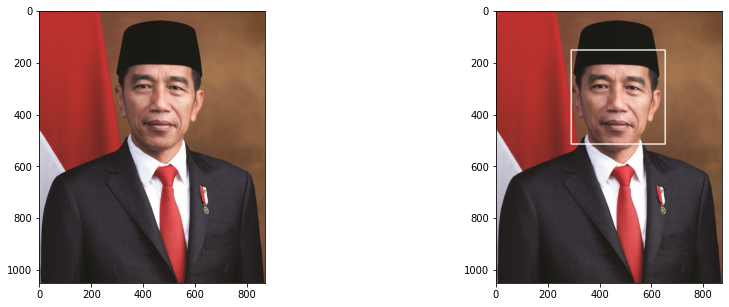

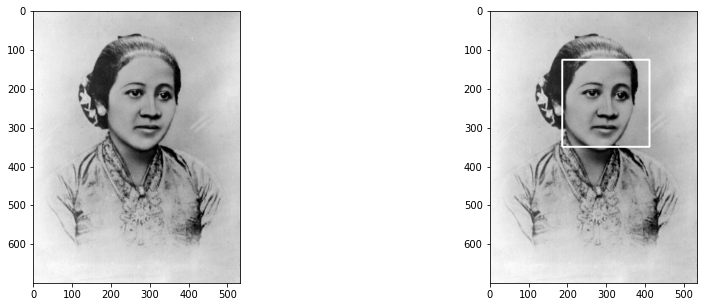

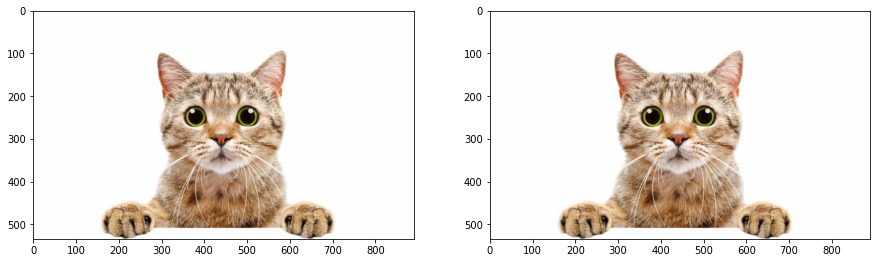

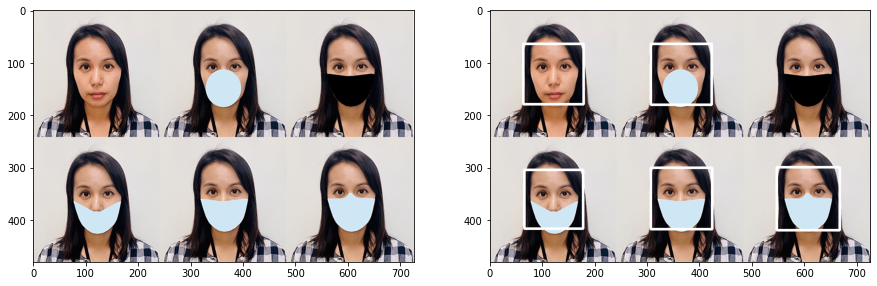

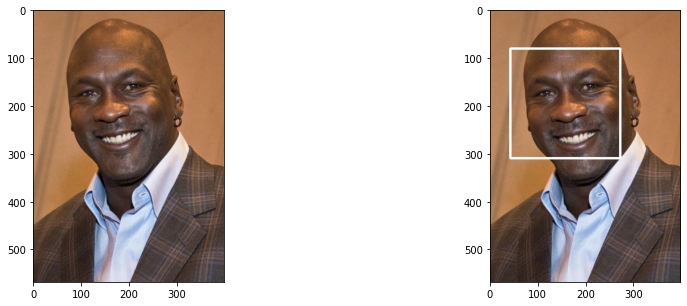

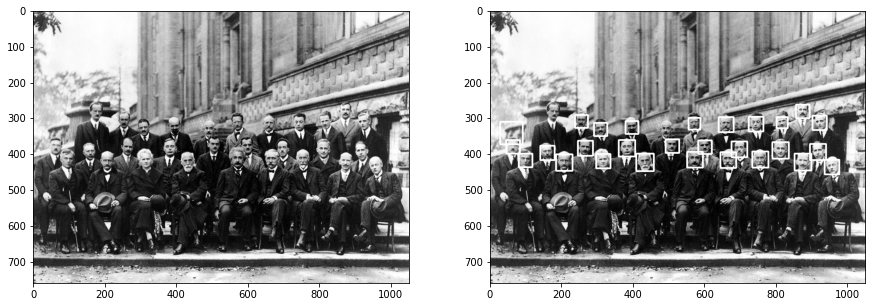

In [6]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/kampus/PCVK/haarcascades/haarcascade_frontalface_alt.xml')
data = ['/content/drive/MyDrive/kampus/PCVK/facedet/jokowi.jpg',
        '/content/drive/MyDrive/kampus/PCVK/facedet/kartini.jpg',
        '/content/drive/MyDrive/kampus/PCVK/facedet/kucing.jpg',
        '/content/drive/MyDrive/kampus/PCVK/facedet/mask.png',
        '/content/drive/MyDrive/kampus/PCVK/facedet/mjordan.jpg',
        '/content/drive/MyDrive/kampus/PCVK/facedet/solvayconf.jpg'
        ]
for i in data:
  image = cv.imread(i)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(255,255,255),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

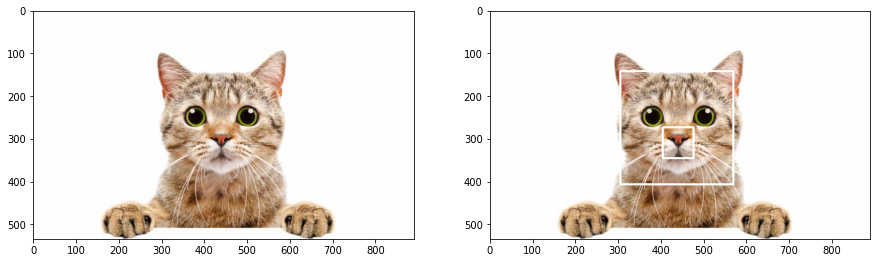

In [7]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/kampus/PCVK/haarcascades/haarcascade_frontalcatface_extended.xml')
data = [
        '/content/drive/MyDrive/kampus/PCVK/facedet/kucing.jpg',
        ]
for i in data:
  image = cv.imread(i)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(255,255,255),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

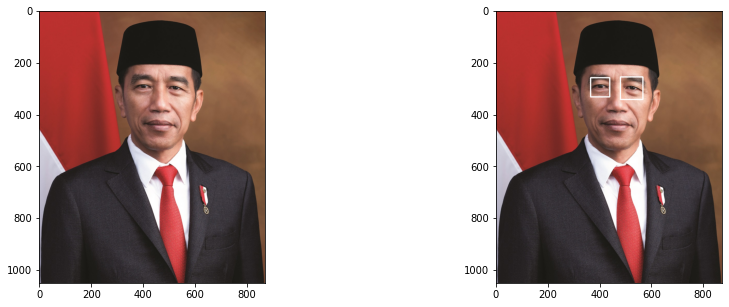

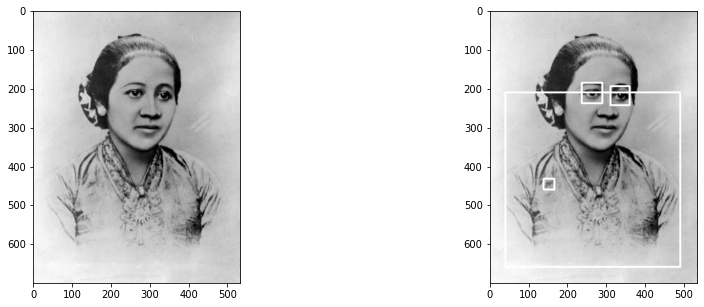

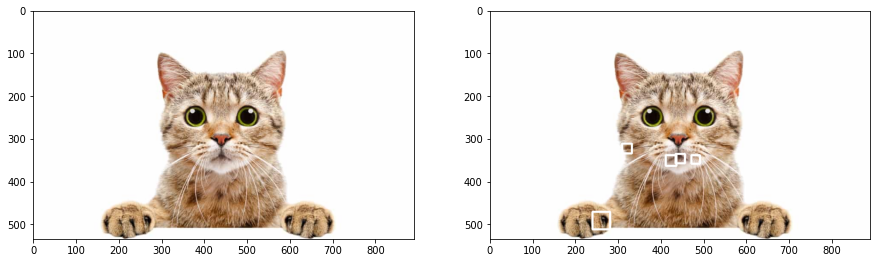

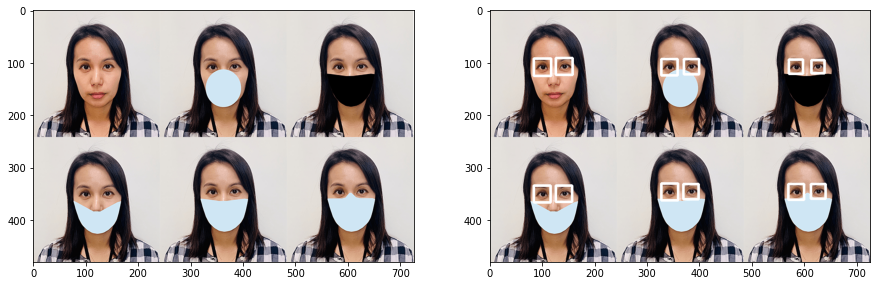

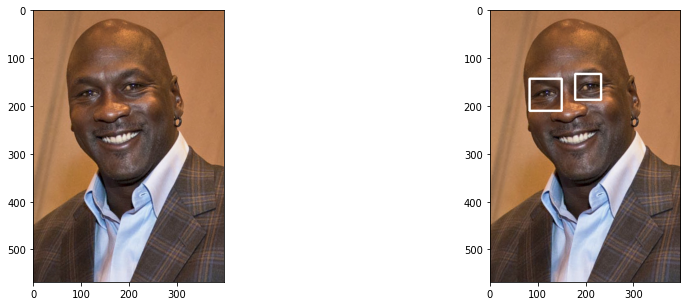

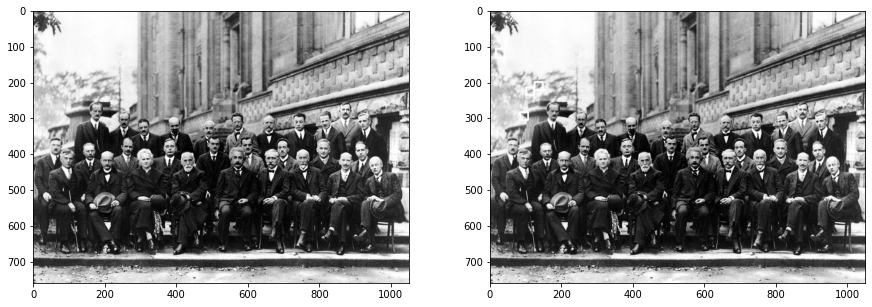

In [8]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/kampus/PCVK/haarcascades/haarcascade_eye.xml')
data = ['/content/drive/MyDrive/kampus/PCVK/facedet/jokowi.jpg',
        '/content/drive/MyDrive/kampus/PCVK/facedet/kartini.jpg',
        '/content/drive/MyDrive/kampus/PCVK/facedet/kucing.jpg',
        '/content/drive/MyDrive/kampus/PCVK/facedet/mask.png',
        '/content/drive/MyDrive/kampus/PCVK/facedet/mjordan.jpg',
        '/content/drive/MyDrive/kampus/PCVK/facedet/solvayconf.jpg'
        ]
for i in data:
  image = cv.imread(i)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(255,255,255),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

In [19]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [20]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [21]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


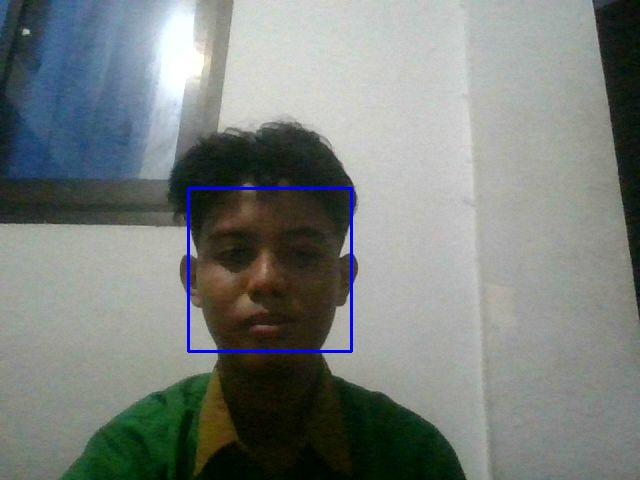

In [22]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

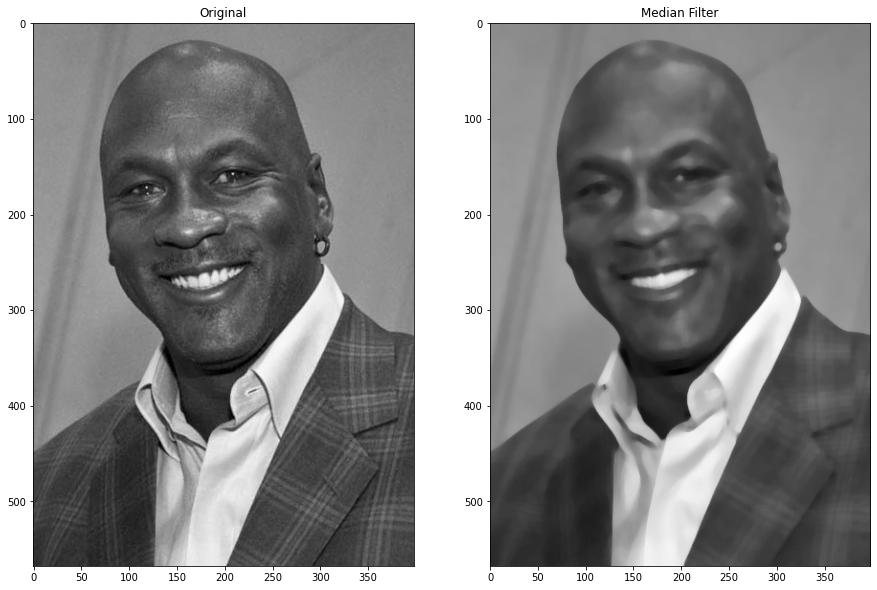

In [23]:
image = cv.imread('/content/drive/MyDrive/kampus/PCVK/facedet/mjordan.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
figure_size = 9 
new_image = cv.medianBlur(image, figure_size)
f, axarr = plt. subplots(1,2,figsize=(15,15))
plt.subplot(121), plt.imshow(image, cmap='gray'),plt.title('Original')
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.show()